In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

# Ignore warnings
warnings.filterwarnings('ignore')

# Font styling 
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

# # Clean data for histogram
df_clean = df[['Age', 'Heart Disease Status']].dropna()Visualization 1: Age Distribution by Heart Disease Status 
This histogram shows how age is distributed among individuals with and without heart disease. As age increases, the prevalence of heart disease tends to increase, which is a common trend in cardiovascular research.

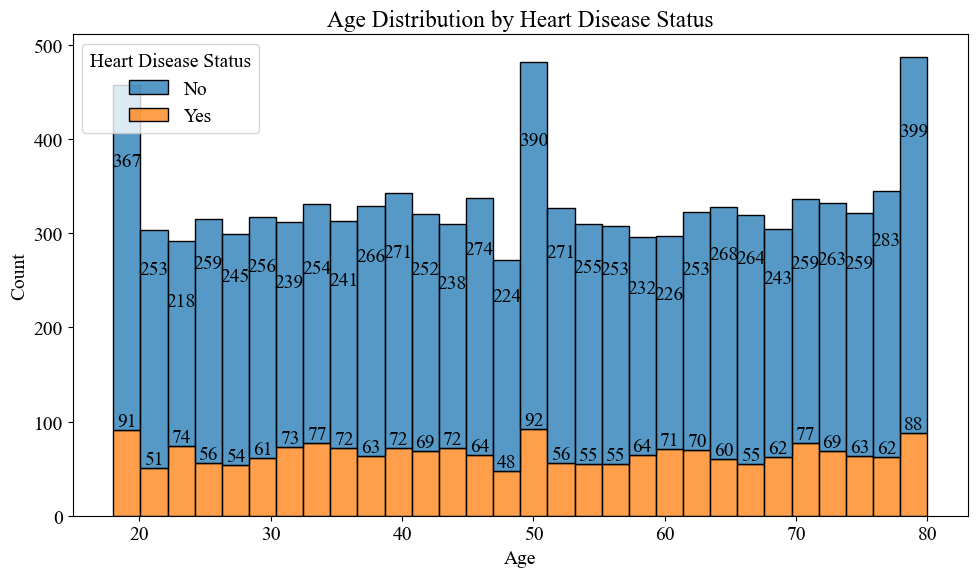

In [9]:
# Clean data for histogram
df_clean = df[['Age', 'Heart Disease Status']].dropna()

# Create histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_clean, x='Age', hue='Heart Disease Status', multiple='stack', kde=False, bins=30)

# Add annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.show()


# Visualization 2: Correlation Heatmap of Clinical Features
This heatmap shows the correlation coefficients between various clinical features and heart disease. Strong positive or negative correlations can reveal important relationships, such as how CRP level or cholesterol level may be associated with disease presence.

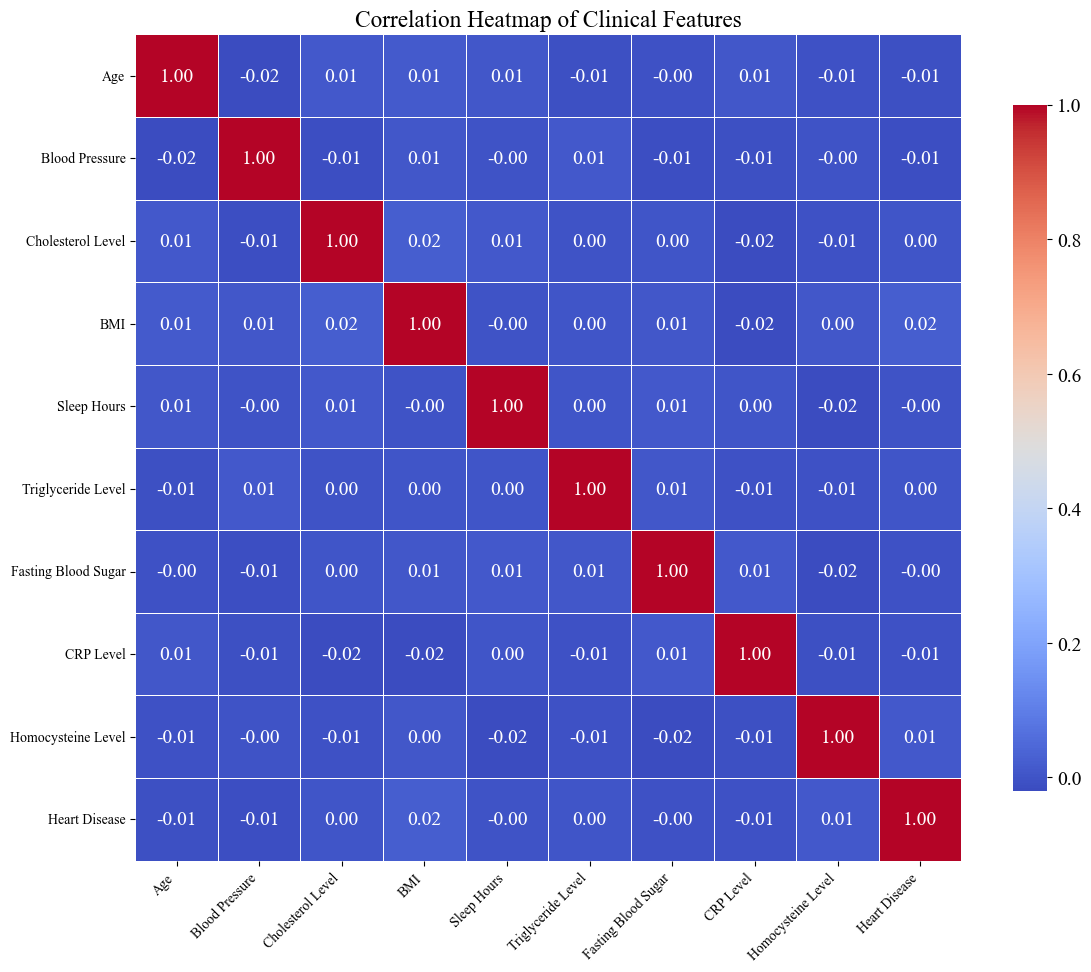

In [20]:
# Prepare numeric data and derive binary target
df_numeric = df.select_dtypes(include=['float64']).copy()
df_numeric['Heart Disease'] = df['Heart Disease Status'].map({'Yes': 1, 'No': 0})

# Drop missing values
df_corr = df_numeric.dropna()

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            cbar_kws={'shrink': 0.8}, linewidths=0.5)

# Title and formatting
plt.title('Correlation Heatmap of Clinical Features')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Visualization 3: Radar Chart of Health Metrics
This radar chart compares the average levels of health-related metrics between individuals with and without heart disease. Each axis represents a different biomarker, providing a holistic view of the differences.

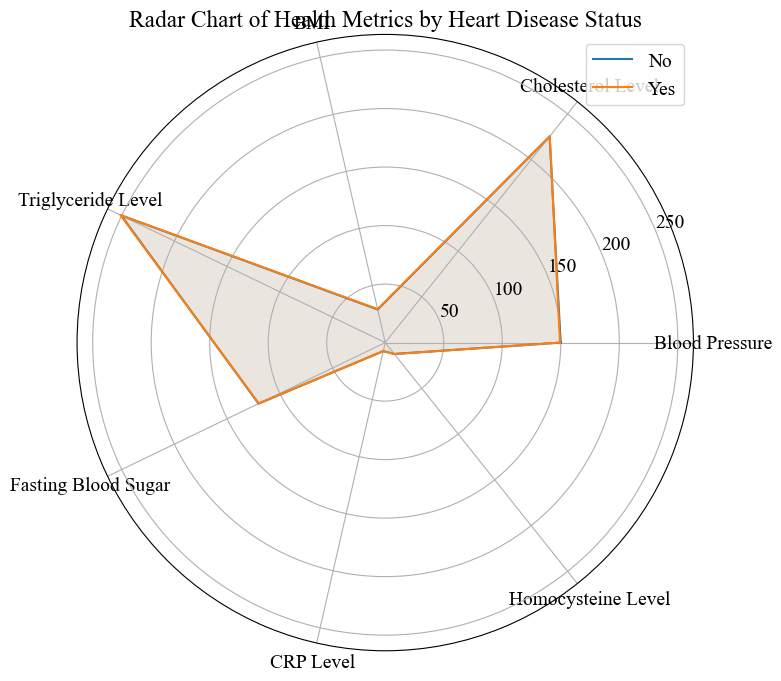

In [17]:
# Select features and clean
features = [
    'Blood Pressure', 'Cholesterol Level', 'BMI',
    'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level'
]
df_radar = df[features + ['Heart Disease Status']].dropna()
radar_data = df_radar.groupby('Heart Disease Status')[features].mean()

# Create radar chart
labels = features
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, row in radar_data.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=idx)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Chart of Health Metrics by Heart Disease Status')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
